<a href="https://colab.research.google.com/github/JosenildoJunior/Competicao_ML/blob/main/11%C2%AA_CompeticaoFLAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Entendimento do problema**

O departamento de crédito de um banco deseja automatizar o processo de tomada de
decisão para a aprovação de empréstimos fiduciários. Sua missão é avaliar um conjunto
de dados sobre o tomador do empréstimo e decidir se um novo empréstimo poderá ser
feito.

# **2. Obtenção dos dados**

O departamento de crédito de um banco deseja automatizar o processo de tomada de
decisão para a aprovação de empréstimos fiduciários. Sua missão é avaliar um conjunto
de dados sobre o tomador do empréstimo e decidir se um novo empréstimo poderá ser
feito.


**Permitindo o acesso do Google Colab ao Drive**

  Esse passo é necessário para que seja possivel importar dados diretamente do drive

In [1]:
# "Montando" o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importando as bibliotecas**

**Para fazer as analises é necessario importar algumas bibliotecas previamente, nesse caso estou importando o pandas para manipulação de dados, também estão sendo importadas o pyplot e o seaborn para visualização dos dados.**

In [2]:
# Importações iniciais
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

**Importação dos dados**

In [3]:
# Fonte: 
df = pd.read_csv('/content/drive/MyDrive/Dados/treinoFLAI_competicao.csv')

# Visualizando as primeiras linhas do DF
df.head()

,Cliente,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
0,bom pagador,19468.0,309447.00,Reforma,Outros,0.50,0.0,1.0,185.6,0.0,33.0,39.2%
1,bom pagador,91688.0,449020.00,Diversas,Outros,15.25,0.0,0.0,234.5,1.0,41.0,NaN
2,bom pagador,34226.0,164394.70,Reforma,Outros,1.25,0.0,0.0,250.5,0.0,10.0,37.2%
3,bom pagador,48356.0,270592.64,Diversas,Outros,2.25,1.0,0.0,230.4,3.0,26.0,29.0%
4,bom pagador,64684.0,78167.16,Diversas,Professional,3.75,0.0,0.0,93.6,0.0,18.0,21.0%


*No conjunto de dados temos as seguintes variáveis*
* Cliente [Variável Resposta]: bom pagador é aquele que pagou a sua dívida corretamente, mau
pagador é aquele que não pagou ou teve atrasos muito grandes em seu pagamento.
* Empréstimo: Valor emprestado ao cliente.
* ValorDoBem: Valor do bem que o cliente está colocando como garantia (em geral, são imóveis).
* Finalidade: Motivo pelo qual o empréstimo está sendo tomado.
* Emprego: Tipo de emprego do cliente.
* TempoEmprego: Tempo em anos que o cliente tem no seu emprego atual.
* Negativos: Número de prerrogativas negativas do cliente (por exemplo, pendências com IPTU,
IPVA, conta de luz, cartão de crédito, etc).
* Atrasos: Número de linhas de crédito que o cliente já entrou em atraso.
* TempoCliente: Tempo do cliente na instituição (em meses).
* LC-Recente: Número de linhas de crédito recentes (adquiridas nos últimos 2 anos).
* LC-Atual: Número de linhas de crédito atuais.
* RDS: Relação Débito/Salário - A porcentagem do salário anual do cliente comprometida em débitos.

# **3. Analise exploratória dos dados**





**Objetivos**: 

* Identificar o tipo de cada variável (numérica, categórica, temporal)
* Identificar qual é a variável target (alvo) para o nosso problema
* Exploração dos dados (medidas descritivas, distribuição das variáveis)
* Visualizar os dados para identificar padrões de fraudes

In [4]:
# Visão geral dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cliente       3300 non-null   object 
 1   Empréstimo    3300 non-null   float64
 2   ValorDoBem    3300 non-null   float64
 3   Finalidade    3300 non-null   object 
 4   Emprego       3300 non-null   object 
 5   TempoEmprego  3122 non-null   float64
 6   Negativos     3122 non-null   float64
 7   Atrasos       3198 non-null   float64
 8   TempoCliente  3300 non-null   float64
 9   LC-Recente    3300 non-null   float64
 10  LC-Atual      3300 non-null   float64
 11  RDS           2647 non-null   object 
dtypes: float64(8), object(4)
memory usage: 309.5+ KB


In [5]:
# Observando as dimensões do DataFrame
df.shape

(3300, 12)

É possível observar que esse dataset tem 3300 entradas e 12 colunas.

Os dados se enquadram em duas categorias:

* **Variáveis numéricas: Empréstimo, ValorDoBem, TempoEmprego, Negativos, Atrasos, TempoCliente, LC-Recente e LC-Atual**

* **Variáveis categóricas: Finalidade, Emprego e RDS.**

**Identificando a variável alvo:**

O objetivo é é avaliar os dados sobre o tomador do empréstimo e decidir se um novo empréstimo poderá ser feito. Assim, a variável **'Cliente'** é a variável adequada para alcançar os objetivos propostos.

In [6]:
# Observando os dados 
df.describe()

,Empréstimo,ValorDoBem,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual
count,3300.000000,3.300000e+03,3122.000000,3122.000000,3198.000000,3300.000000,3300.000000,3300.000000
mean,58841.030909,3.256274e+05,9.475208,0.212684,0.413696,182.681818,1.153333,21.763333
std,34109.356093,1.757902e+05,7.540252,0.726832,1.087892,86.159247,1.695742,9.900538
min,4710.000000,2.512000e+04,0.000000,0.000000,0.000000,1.100000,0.000000,0.000000
25%,35796.000000,2.151960e+05,3.500000,0.000000,0.000000,119.450000,0.000000,15.000000
50%,52438.000000,2.884828e+05,7.750000,0.000000,0.000000,177.200000,1.000000,20.000000
75%,73162.000000,3.800829e+05,13.750000,0.000000,0.000000,232.750000,2.000000,27.000000
max,279460.000000,2.687554e+06,41.250000,10.000000,15.000000,1170.200000,18.000000,67.000000


Nossos clientes tem em média 58 mil em emprestimos, os clientes têm em média 9 anos em empregos, a maioria dos clientes não tem muitas prerrogativas negativas, os clientes não costumam atrasar muito suas linhas de créditos, nossos clientes têm em média 182 meses como clientes, nos últimos 2 anos nossos clientes pegaram em média uma linha de crédito e atualmente nossos clientes tem em média 21 linhas de créditos.

## Alterando os valores da variável alvo

O tipo da variável alvo está como categórica, isso pode dificultar o funcionamento do modelo que vai ser criado, sendo assim faz se necessário um tratamento nessa variável.

In [7]:
# Observando os valores presentes na variável
df['Cliente'].value_counts(normalize = True)

bom pagador    0.813939
mau pagador    0.186061
Name: Cliente, dtype: float64

*Podemos notar que na base temos 81,39% de bons pagadores equanto os outros 18,60% são maus pagadores*

Criando função para realizar o tratamento necessário na variável 'Cliente'

In [8]:
# Criando uma função para substituir os valores
def aux(x):
    if x == 'bom pagador':
        return 0
    elif x == 'mau pagador':
        return 1 

# Aplicando a função na coluna cliente
df['Cliente'] = df['Cliente'].apply(aux) 

*Conferindo como ficou a variável após a função ter sido aplicada.*

In [9]:
# Observando os valores presentes na variável
df['Cliente'].value_counts()

0    2686
1     614
Name: Cliente, dtype: int64

*Agora que a variável esta devidamente tratada podemos prosseguir*

**Criando um dataset apenas com as variaveis númericas. O objetivo da criação desse novo dataset é a observação da correlação entre as variaveisa a partir de uma matriz de correlação.**

In [10]:
# Criando um dataset apenas com as variaveis númericas e acrescentando a variavel churn para observar a correlação entre as outras
df_num = df[['Empréstimo', 'ValorDoBem', 'TempoEmprego', 'Negativos', 'Atrasos', 'TempoCliente', 'LC-Recente', 'LC-Atual', 'Cliente']]

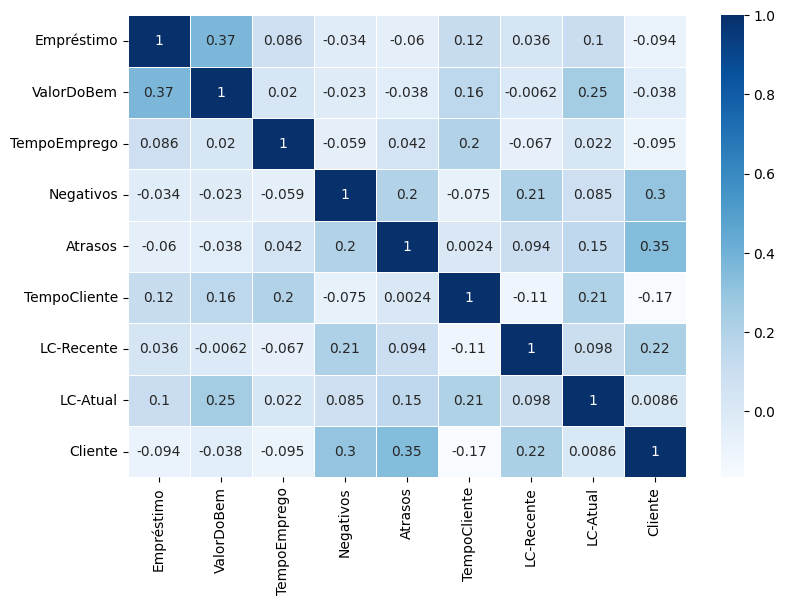

In [11]:
# Criando a matriz
plt.figure(figsize=(9,6))
sns.heatmap(df_num.corr(),annot = True, cmap='Blues',linewidth=.5);

* É possível observar uma correlação positiva entre a variável alvo 'Cliente' e as variáveis 'Negativos', 'Atrasos' e 'LC-Recente' sendo que a maior correlação é entre 'Cliente' e 'Atrasos', seguido por 'Cliente e Negativos'. Por se tratar de uma correlação positiva podemos afirmar que enquanto uma variável aumenta a outra também vai aumentar, ou seja, elas tendem a se mover na mesma direção.

* Vale destacar que a maior correlação que temos é entre a variável 'ValorDoBem' e 'Empréstimo', também apresentam uma correlação positiva.

## Variáveis que apresentaram maiores correlações em relação à variável alvo.

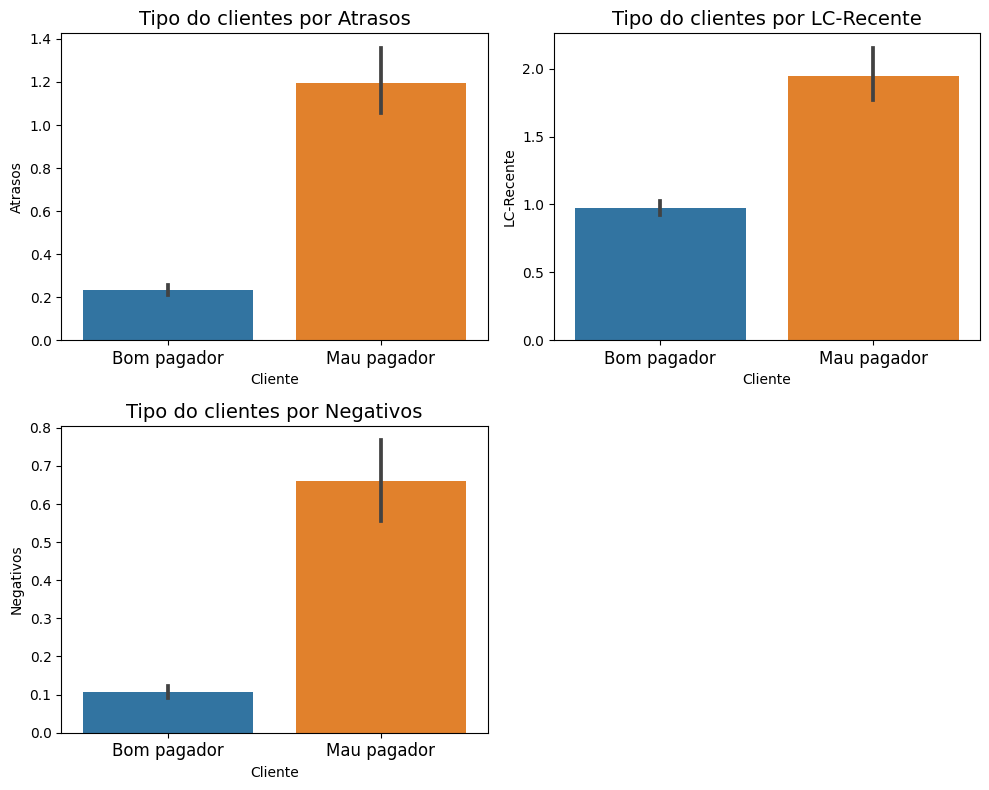

In [12]:
# Dimensões da figura
plt.figure(figsize=(10, 8))

# Grafico 1
plt.subplot(2,2,1)
# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='Atrasos')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por Atrasos', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Grafico 2
plt.subplot(2,2,2)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='LC-Recente')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por LC-Recente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Grafico 3
plt.subplot(2,2,3)

grafico = sns.barplot(data=df, x='Cliente', y='Negativos')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por Negativos', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)

plt.tight_layout()

Quanto maior o número de linhas de créditos atrasadas maiores são as chances do cliente ser um mau pagador, o mesmo se aplica aos clientes, com prerrogativas negativas e os clientes que adquiriram linhas de créditos recentes tendem a ser mau pagadores também.

## Variáveis que apresentaram menores correlações em relação à variável alvo.

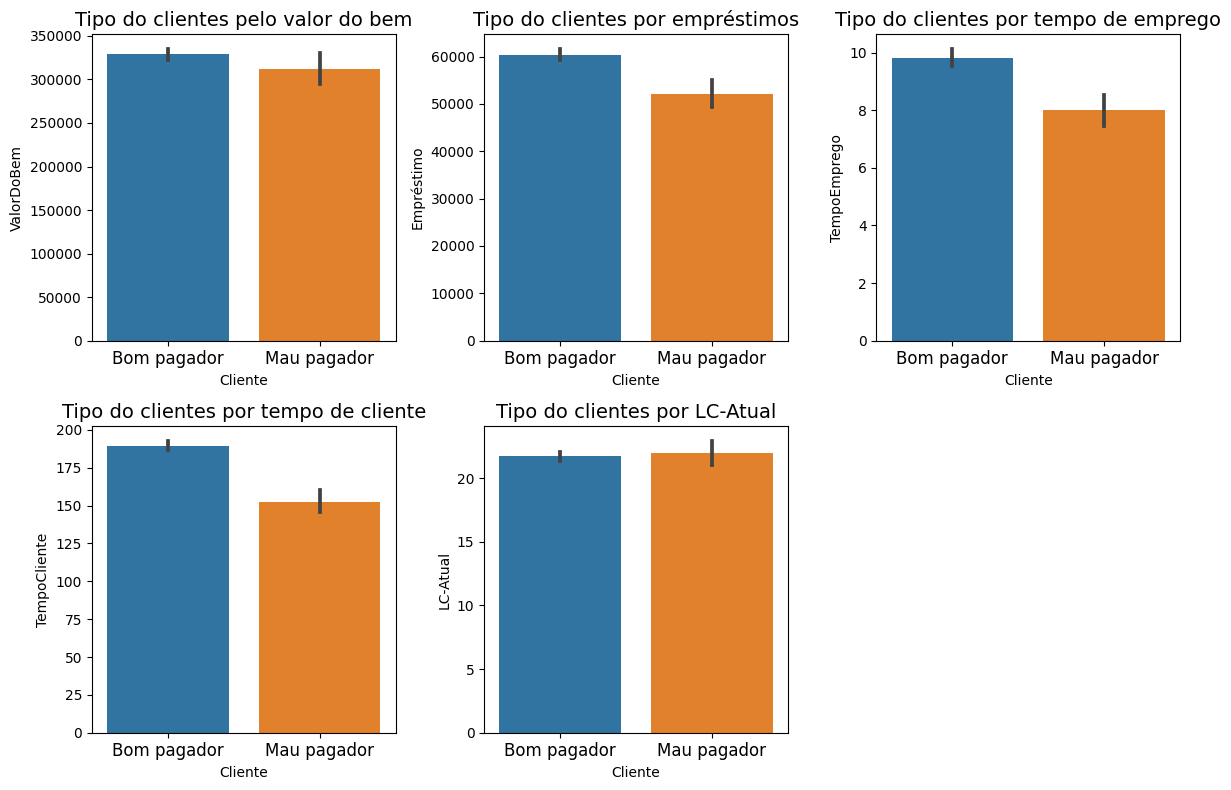

In [13]:
# Dimensões da figura
plt.figure(figsize=(12, 8))

# Gráfico 1
plt.subplot(2,3,1)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='ValorDoBem')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes pelo valor do bem', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 2
plt.subplot(2,3,2)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='Empréstimo')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por empréstimos', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 3
plt.subplot(2,3,3)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='TempoEmprego')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por tempo de emprego', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


# Gráfico 4
plt.subplot(2,3,4)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='TempoCliente')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por tempo de cliente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 5
plt.subplot(2,3,5)

# Criando o gráfico 
grafico = sns.barplot(data=df, x='Cliente', y='LC-Atual')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por LC-Atual', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


plt.tight_layout()

*Podemos confirmar agora que essas variáveis não são tão impactantes em relação à variável alvo*

**Algumas anotações a respeito:**

*Podemos observar que quanto mais antigo o cliente maiores são as chances de que ele seja um bom pagador, quanto mais tempo o cliente tem de trabalho menores são as chances de que ele seja um mau pagador*

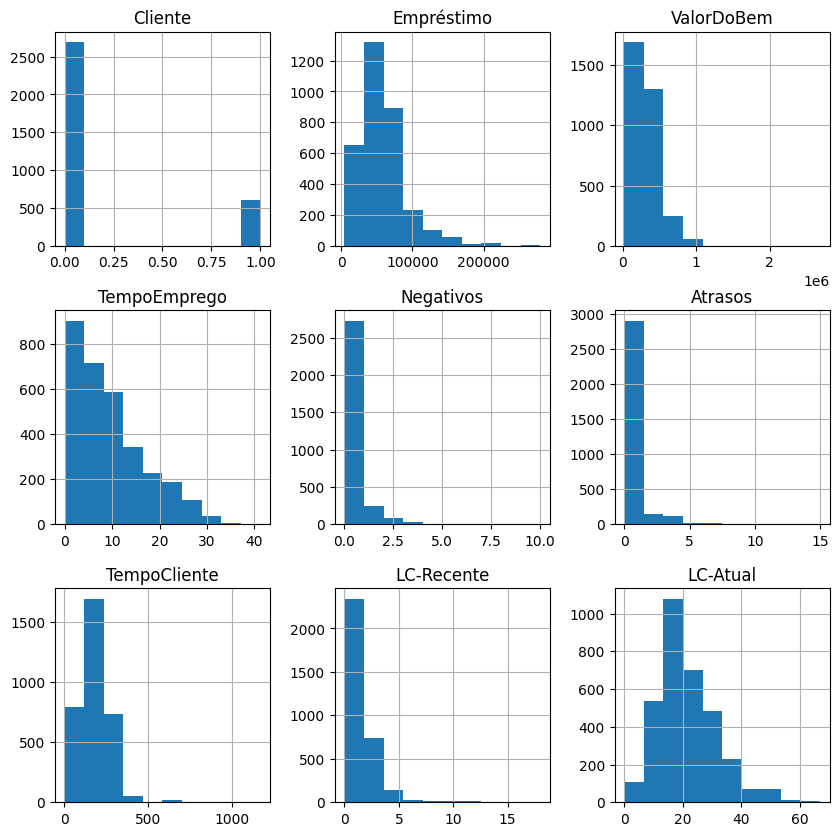

In [16]:
# Criando um histograma com todas as colunas do dataset
df.hist(figsize=(10,10));

* Podemos observar que na variável cliente

* Tempo Emprego é notável uma assimetria a direita, onde a maioria de nossos dados estão entre zero e 13 anos.

* Nota-se uma assimetria à direita na variável empréstimo, a maioria dos dados esta entre 0 e 70.000.

* Em valor do bem a maioria dos nossos dados estão entre 0 e 3 milhões.

* Na variável negativos observa-se menos de 75% dos clientes apresentam algum tipo de prerrogativas negativas.

* O mesmo se aplica aos clientes com algum tipo de atraso, os clientes que apresentam algum tipo de atraso representa menos de 75% da base de dados.

* Nossos clientes têm em média cerca de 182 meses como cliente, sendo que a maioria dos clientes está entre 1 mês e 232 meses.

* Nos últimos 2 anos 75% dos nossos clientes não tem mais que 2 linhas de créditos adquiridas, enquanto a maioria dos nossos.

* Podemos notar uma concentração nos dados por volta de 15 e 27, evidenciando que a maioria dos nossos clientes tem entre 15 e 27 linhas ativas.

# **4. Pré-Processamento**

Objetivos:

* Eliminar as variáveis que não serão utilizadas;
* Separar amostra dos dados
* Identificação de dados ausentes;
* Remoção de Outliers;
* Escala das variáveis

## **A. Eliminando variavies que não serão utilizadas.**

Por mais que algumas variáveis apresentem poucas influências, nenhuma delas pode ser descartada do dataset atualmente, então não existem variáveis a serem descartadas.

## **B. Tratando dados ausentes**

*Verificando quais as variáveis que tem dados faltantes.*

In [20]:
# Observando dados faltantes e ordenando em ordem decrescente
def percent_ausentes(df):
    p_faltantes = df.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df.columns, 
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)
        
    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False) 

percent_ausentes(df)

,Variavéis,% de ausentes
11,RDS,0.197879
5,TempoEmprego,0.053939
6,Negativos,0.053939
7,Atrasos,0.030909
0,Cliente,0.000000
1,Empréstimo,0.000000
2,ValorDoBem,0.000000
3,Finalidade,0.000000
4,Emprego,0.000000
8,TempoCliente,0.000000


## Coluna Finalidade

A coluna finalidade é uma variavel categorica, então é necessario que ela passe por um tratamento para que o modelo de machine learning que vai ser criado tenha um melhor desempenho.

In [25]:
df['Finalidade'].value_counts()

Diversas    2270
Reforma     1030
Name: Finalidade, dtype: int64

In [ ]:
def aux2(x):
  if x == 'Diversas':
    x == 1
  else:
    x == 0

# Aplicando a função na coluna Finalidade
df['Finalidade'] = df['Finalidade'].apply(aux2) 

## Coluna emprego

In [26]:
df['Emprego'].value_counts()

Outros          1330
Professional     803
Geral            569
Gerente          433
Autônomo          97
Comissionado      68
Name: Emprego, dtype: int64

## Coluna RDS

In [29]:
df['RDS'].value_counts()

37.0%    25
40.1%    24
40.0%    24
37.8%    24
35.4%    23
         ..
50.6%     1
53.2%     1
3.0%      1
57.8%     1
53.5%     1
Name: RDS, Length: 358, dtype: int64